In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/PMGSY.csv')
area_df = pd.read_csv('/content/drive/MyDrive/state area.csv')
f2 = df.columns
f2

Mounted at /content/drive


Index(['STATE_NAME', 'DISTRICT_NAME', 'PMGSY_SCHEME',
       'NO_OF_ROAD_WORK_SANCTIONED', 'NO_OF_BRIDGES_SANCTIONED',
       'NO_OF_ROAD_WORKS_COMPLETED', 'NO_OF_BRIDGES_COMPLETED',
       'NO_OF_ROAD_WORKS_BALANCE', 'NO_OF_BRIDGES_BALANCE',
       'LENGTH_OF_ROAD_WORK_SANCTIONED_KM', 'COST_OF_WORKS_SANCTIONED_LAKHS',
       'LENGTH_OF_ROAD_WORK_COMPLETED_KM', 'EXPENDITURE_OCCURED_LAKHS',
       'LENGTH_OF_ROAD_WORK_BALANCE_KM'],
      dtype='object')

In [ ]:
df.drop(['NO_OF_BRIDGES_SANCTIONED'], axis=1, inplace=True)
df.drop(['NO_OF_BRIDGES_COMPLETED'], axis=1, inplace=True)
df.drop(['NO_OF_BRIDGES_BALANCE'], axis=1, inplace=True)
display(df.columns)

Index(['STATE_NAME', 'DISTRICT_NAME', 'PMGSY_SCHEME',
       'NO_OF_ROAD_WORK_SANCTIONED', 'NO_OF_ROAD_WORKS_COMPLETED',
       'NO_OF_ROAD_WORKS_BALANCE', 'LENGTH_OF_ROAD_WORK_SANCTIONED_KM',
       'COST_OF_WORKS_SANCTIONED_LAKHS', 'LENGTH_OF_ROAD_WORK_COMPLETED_KM',
       'EXPENDITURE_OCCURED_LAKHS', 'LENGTH_OF_ROAD_WORK_BALANCE_KM'],
      dtype='object')

In [ ]:

# Calculate expenditure per km sanctioned

zero_values1 = (df['LENGTH_OF_ROAD_WORK_SANCTIONED_KM'] == 0).sum()
zero_values2 = (df['COST_OF_WORKS_SANCTIONED_LAKHS'] == 0).sum()
zero_values3 = (df['EXPENDITURE_OCCURED_LAKHS'] == 0).sum()
zero_values4 = (df['LENGTH_OF_ROAD_WORK_COMPLETED_KM'] == 0).sum()
print(zero_values1, zero_values2, zero_values3, zero_values4)

df = df[df['LENGTH_OF_ROAD_WORK_SANCTIONED_KM'] != 0]
df = df[df['COST_OF_WORKS_SANCTIONED_LAKHS'] != 0]
df = df[df['EXPENDITURE_OCCURED_LAKHS'] != 0]
df = df[df['LENGTH_OF_ROAD_WORK_COMPLETED_KM'] != 0]

zero_values1 = (df['LENGTH_OF_ROAD_WORK_SANCTIONED_KM'] == 0).sum()
zero_values2 = (df['COST_OF_WORKS_SANCTIONED_LAKHS'] == 0).sum()
zero_values3 = (df['EXPENDITURE_OCCURED_LAKHS'] == 0).sum()
zero_values4 = (df['LENGTH_OF_ROAD_WORK_COMPLETED_KM'] == 0).sum()
print(zero_values1, zero_values2, zero_values3, zero_values4)


df['Sanctioned_expenditure_per_km'] = df['COST_OF_WORKS_SANCTIONED_LAKHS'] / df['LENGTH_OF_ROAD_WORK_SANCTIONED_KM']

# Calculate actual expenditure per km


df['actual_expenditure_per_km'] = df['EXPENDITURE_OCCURED_LAKHS'] / df['LENGTH_OF_ROAD_WORK_COMPLETED_KM']

df['Sanctioned_expenditure_per_km_in_rupees'] = df['Sanctioned_expenditure_per_km']*100000

df['actual_expenditure_per_km_in_rupees'] = df['actual_expenditure_per_km']*100000
# Example assuming you have an allocated expenditure column

df['difference'] = df['actual_expenditure_per_km_in_rupees'] - df['Sanctioned_expenditure_per_km_in_rupees']

# Display the updated DataFrame

display(df)


1 0 124 143
0 0 0 0


,STATE_NAME,DISTRICT_NAME,PMGSY_SCHEME,NO_OF_ROAD_WORK_SANCTIONED,NO_OF_ROAD_WORKS_COMPLETED,NO_OF_ROAD_WORKS_BALANCE,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS,LENGTH_OF_ROAD_WORK_COMPLETED_KM,EXPENDITURE_OCCURED_LAKHS,LENGTH_OF_ROAD_WORK_BALANCE_KM,Sanctioned_expenditure_per_km,actual_expenditure_per_km,Sanctioned_expenditure_per_km_in_rupees,actual_expenditure_per_km_in_rupees,difference
1,Andhra Pradesh,Bapatla,PMGSY-II,6,6,0,53.430,28.74360,53.763,24.3953,0.00,0.537967,0.453756,53796.743403,45375.630080,-8421.113322
2,Andhra Pradesh,Chittoor,PMGSY-III,37,33,4,276.248,172.50410,228.924,104.2290,40.24,0.624454,0.455300,62445.375170,45529.957540,-16915.417630
3,Andhra Pradesh,Guntur,PMGSY-II,4,4,0,35.100,17.37940,34.839,13.8579,0.00,0.495140,0.397770,49513.960114,39776.974081,-9736.986033
4,Andhra Pradesh,Kakinada,RCPLWEA,3,3,0,19.470,12.19000,19.470,10.7893,0.00,0.626091,0.554150,62609.142270,55414.997432,-7194.144838
5,Andhra Pradesh,Krishna,PMGSY-I,159,159,0,368.900,89.00700,358.310,87.3230,0.00,0.241277,0.243708,24127.676877,24370.796238,243.119361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2240,West Bengal,Paschim Burdwan,PMGSY-II,4,4,0,36.120,22.78042,35.679,17.8088,0.00,0.630687,0.499140,63068.715393,49913.954988,-13154.760406
2241,West Bengal,Paschim Medinipur,PMGSY-II,19,19,0,169.630,165.81221,169.390,133.7978,0.00,0.977493,0.789880,97749.342687,78988.015821,-18761.326866
2242,West Bengal,Purulia,PMGSY-II,18,18,0,143.660,112.21407,142.905,82.0457,0.00,0.781109,0.574128,78110.865933,57412.756726,-20698.109207
2243,West Bengal,Siliguri M.P.,PMGSY-I,94,94,0,354.167,121.07113,352.332,110.1007,0.00,0.341848,0.312491,34184.757473,31249.134339,-2935.623134


In [ ]:
# Frequency distribution of 'State'
state_counts = df['STATE_NAME'].value_counts()
print(state_counts.agg('sum'))
print("State Frequency Distribution:\n", state_counts)

2096
State Frequency Distribution:
 STATE_NAME
Uttar Pradesh          227
Madhya Pradesh         155
Rajasthan              143
Bihar                  121
Tamil Nadu             110
Maharashtra            101
Telangana              100
Gujarat                 98
Odisha                  93
Chhattisgarh            91
Karnataka               90
Jharkhand               88
Andhra Pradesh          81
Assam                   73
West Bengal             65
Punjab                  62
Haryana                 61
Jammu And Kashmir       60
Arunachal Pradesh       54
Kerala                  42
Uttarakhand             36
Himachal Pradesh        30
Nagaland                22
Tripura                 20
Manipur                 18
Meghalaya               17
Mizoram                 14
Sikkim                  12
Ladakh                   6
Andaman And Nicobar      4
Puducherry               2
Name: count, dtype: int64


Inference: The scheme covers total of 2245 constructions going on all over country. the top 3 states with most constructions going on covered are Uttar Pradesh, Madhya Pradesh and Rajasthan.

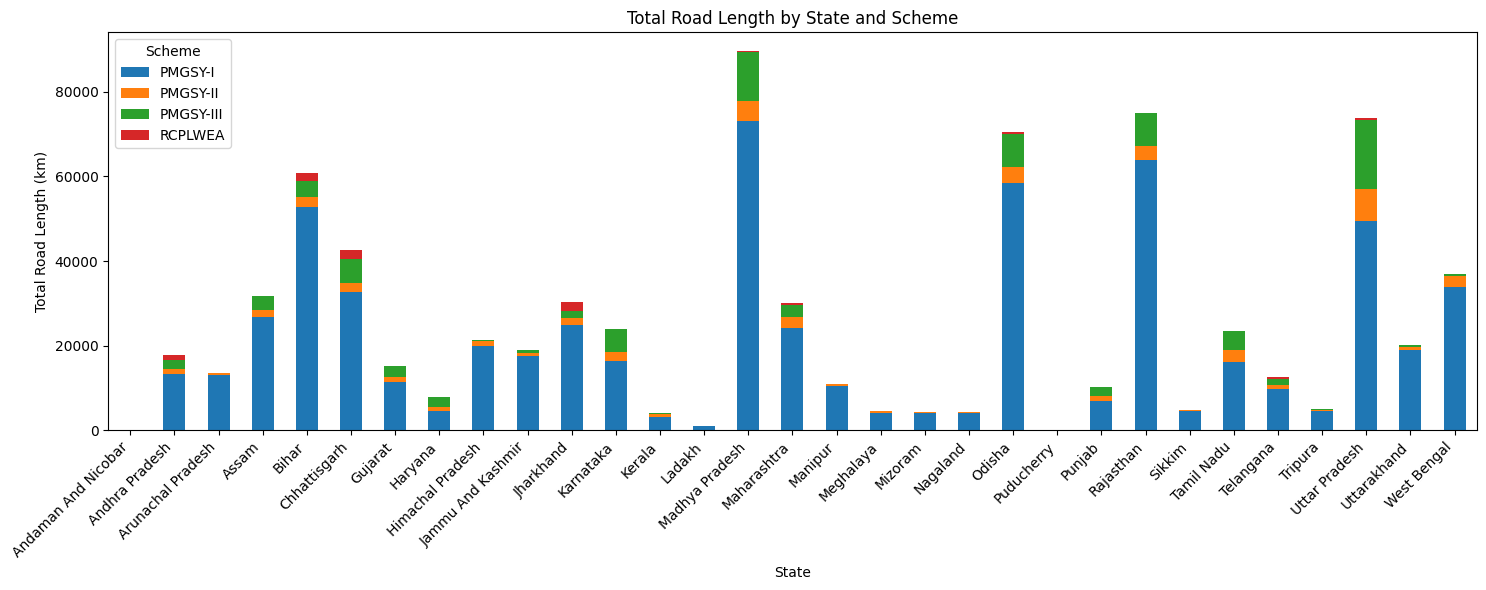

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Group data by state and scheme, then sum the road lengths
scheme_summary = df.groupby(['STATE_NAME', 'PMGSY_SCHEME'])['LENGTH_OF_ROAD_WORK_COMPLETED_KM'].sum().unstack()

scheme_summary.to_csv('scheme_summary.csv')

# Plotting
scheme_summary.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Total Road Length by State and Scheme')
plt.xlabel('State')
plt.ylabel('Total Road Length (km)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Scheme')
plt.tight_layout()
plt.show()

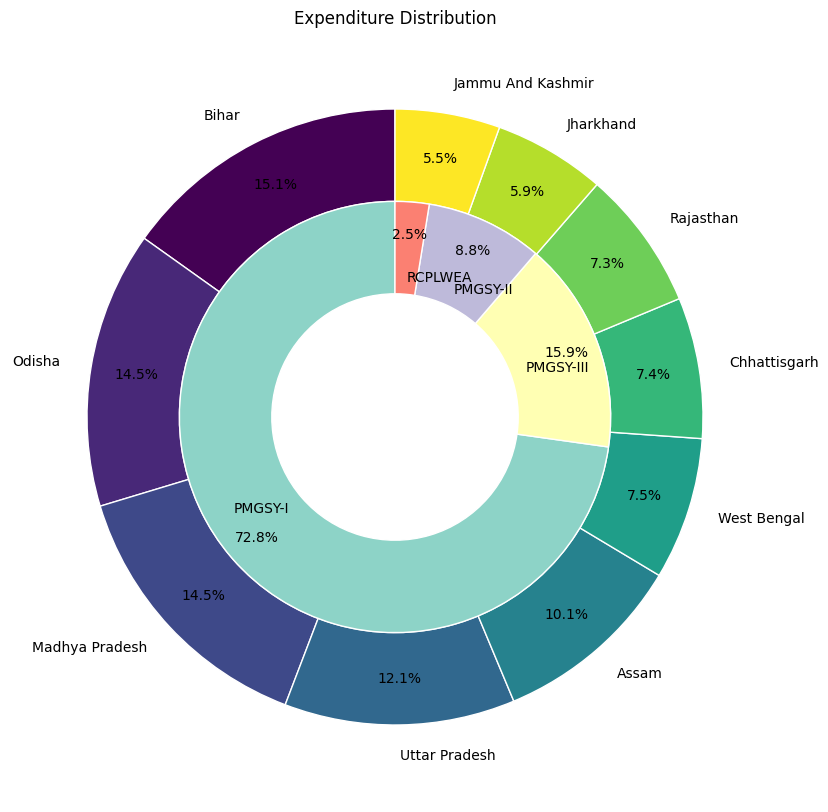

In [ ]:

scheme_expenditure = df.groupby('PMGSY_SCHEME')['EXPENDITURE_OCCURED_LAKHS'].sum().sort_values(ascending=False).head(10)
total_expenditure = df.groupby('STATE_NAME')['EXPENDITURE_OCCURED_LAKHS'].sum().sort_values(ascending=False).head(10)

scheme_expenditure.to_csv('scheme_expenditure.csv')
total_expenditure.to_csv('total_expenditure.csv')
# Data for the outer pie chart
labels_outer = total_expenditure.keys()
sizes_outer = total_expenditure.values

fig, ax = plt.subplots(figsize=(10, 10))

# Outer pie chart
size = 0.3  # Adjust this to control the width of the outer ring
outer_colors = plt.cm.viridis(np.linspace(0, 1, len(total_expenditure)))  # Using viridis colormap
ax.pie(total_expenditure.values, radius=1, labels=total_expenditure.keys(), pctdistance = 0.85,
       autopct='%1.1f%%', startangle=90, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

labels_inner = scheme_expenditure.keys()
sizes_inner = scheme_expenditure.values

# Inner pie chart
inner_colors = plt.cm.Set3(np.arange(len(scheme_expenditure)))  # Using Set3 colormap
ax.pie(scheme_expenditure.values, radius=1 - size,  # Adjust radius for nesting
       labels=scheme_expenditure.keys(), autopct='%1.1f%%', startangle=90,
       labeldistance=0.65, colors=inner_colors, pctdistance = 0.85,
       wedgeprops=dict(width=size, edgecolor='w'))

# Set title and aspect ratio
ax.set(aspect="equal", title='Expenditure Distribution')
plt.show()



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

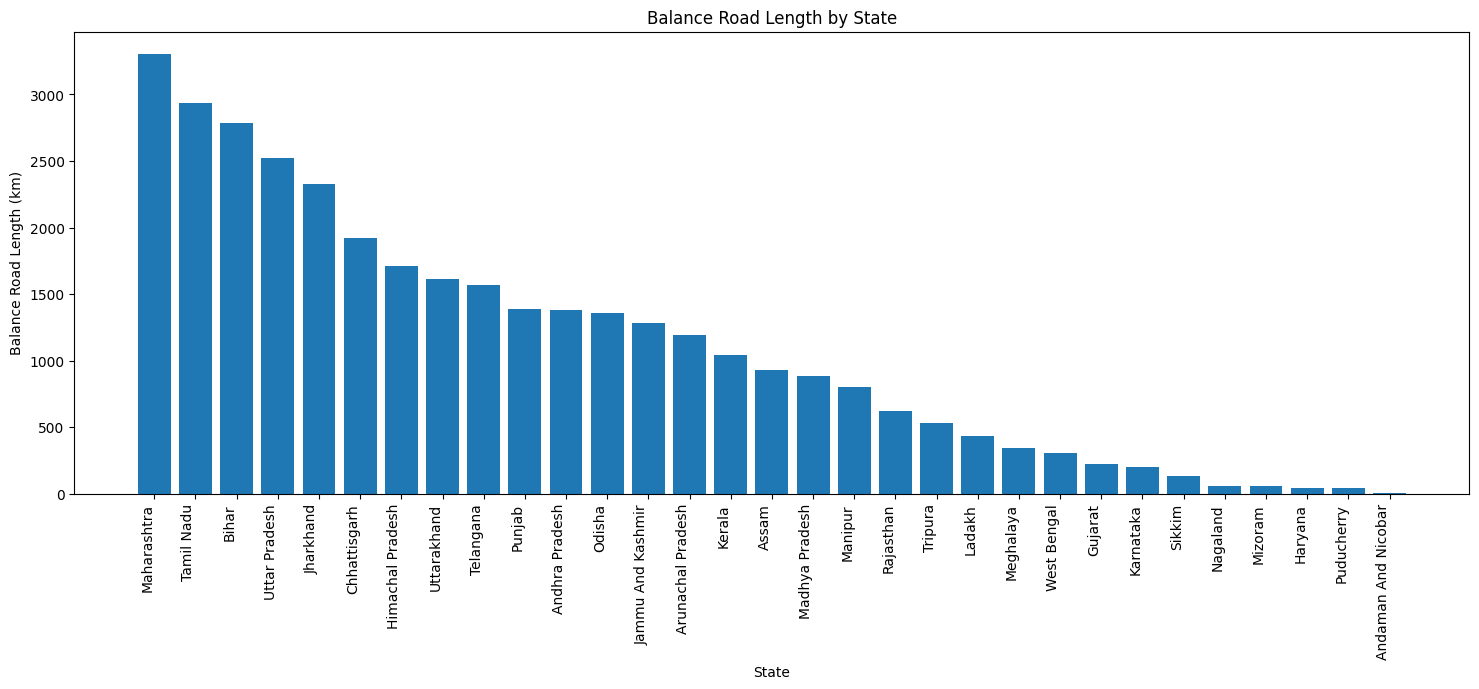

In [ ]:
df_balance = df.groupby('STATE_NAME')['LENGTH_OF_ROAD_WORK_BALANCE_KM'].sum().sort_values(ascending=False)

df_balance.to_csv('df_balance.csv')

plt.figure(figsize=(18, 6))
plt.title('Balance Road Length by State')
plt.xlabel('State')
plt.ylabel('Balance Road Length (km)')
plt.xticks(rotation=90, ha='right')
plt.bar(df_balance.index, df_balance.values)
plt

,difference
STATE_NAME,
Telangana,144904.993588
Uttarakhand,78472.397855
Tripura,63877.934231
Meghalaya,41846.470746
Arunachal Pradesh,29105.463197
Puducherry,18543.142700
Maharashtra,8785.468792
Ladakh,7489.726326
Jharkhand,5893.164488


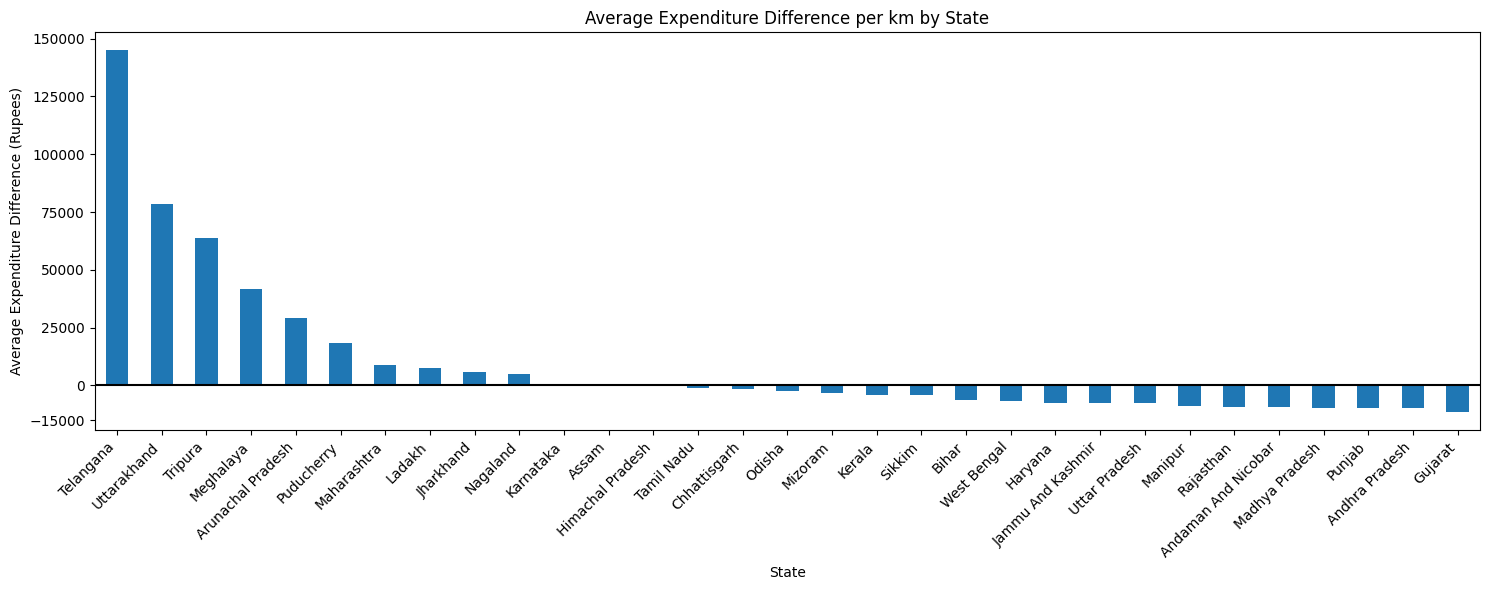

In [ ]:

state_difference = df.groupby('STATE_NAME')['difference'].mean().sort_values(ascending=False)
display(state_difference)


state_difference.to_csv('state_difference.csv')
# Create the bar plot
plt.figure(figsize=(15, 6))
bars  = state_difference.plot(kind='bar')
plt.title('Average Expenditure Difference per km by State')
plt.xlabel('State')
plt.ylabel('Average Expenditure Difference (Rupees)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, ticks = [150000, 125000, 100000, 75000, 50000, 25000, 0, -15000])
plt.axhline(y=0, color='black', linestyle='-')
plt.tight_layout()
plt.show()

In [ ]:
df_states = df['STATE_NAME'].unique()
area_df_states = area_df['STATE_NAME'].unique()
non_common_states_df = np.setdiff1d(df_states, area_df_states)
non_common_states_area_df = np.setdiff1d(area_df_states, df_states)
print(non_common_states_df)
print(non_common_states_area_df)



['Ladakh']
['Chandigarh' 'Dadra & Nagar Haveli' 'Daman & Diu' 'Delhi' 'Goa'
 'Lakshadweep']


In [ ]:

merged_df = pd.merge(df, area_df, on='STATE_NAME', how='left')
df['AREA_SQ_KM'] = merged_df['AREA_SQ_KM'].astype(float)
merged_df['Length Per SQ. KM'] = merged_df['LENGTH_OF_ROAD_WORK_COMPLETED_KM']/merged_df['AREA_SQ_KM']
merged_df.head(5).to_csv('merged_df.csv')


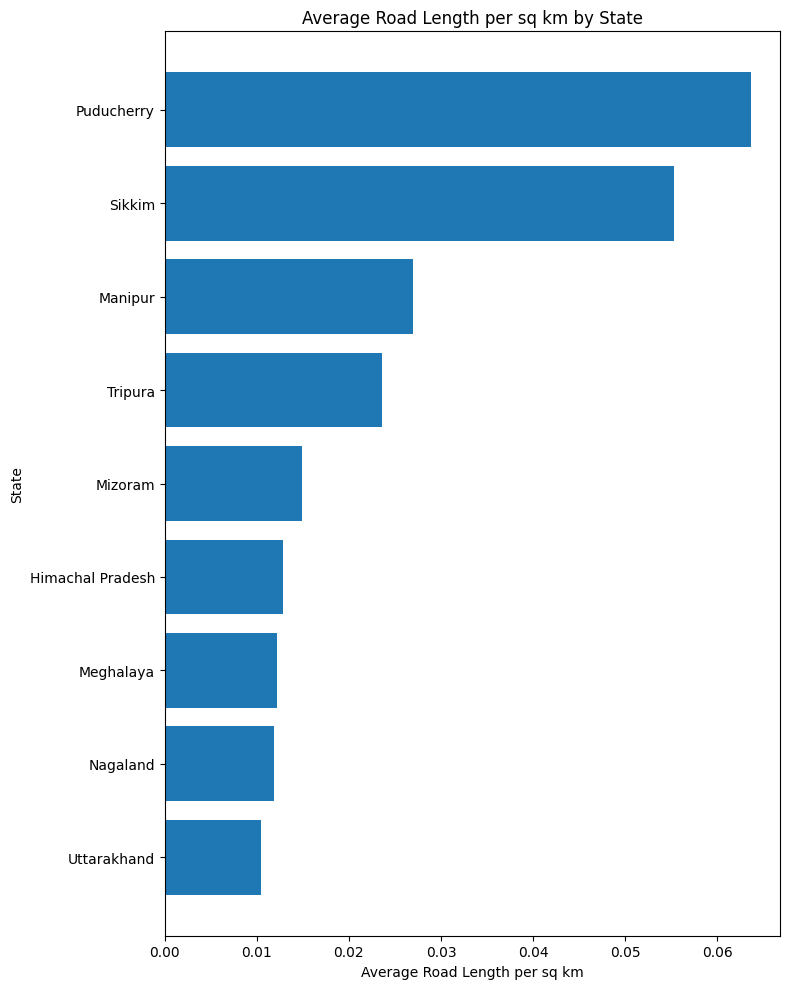

In [ ]:

import matplotlib.pyplot as plt

# Group by state and calculate the mean of 'Length Per SQ. KM'
length_per_sqkm_by_state = merged_df.groupby('STATE_NAME')['Length Per SQ. KM'].mean().sort_values(ascending=True).tail(10)

length_per_sqkm_by_state.to_csv('length_per_sqkm_by_state.csv')

# Create the plot
plt.figure(figsize=(8, 10))  # Adjust figsize for better readability
plt.barh(length_per_sqkm_by_state.index, length_per_sqkm_by_state.values)  # Use barh for horizontal bars
plt.title('Average Road Length per sq km by State')
plt.ylabel('State')  # Swap xlabel and ylabel
plt.xlabel('Average Road Length per sq km')
plt.tight_layout()
plt.show()


Road Density: The last plot showing average road length per square kilometer provides insight into road density. States with higher values have a greater concentration of roads relative to their area, indicating better connectivity within the state. This is an important factor in accessibility and regional development.

<ipython-input-13-6439594a6ee3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(merged_df, x='NO_OF_ROAD_WORKS_COMPLETED', y='PMGSY_SCHEME', inner='box', palette='Dark2')


PMGSY_SCHEME
PMGSY-I      163380
PMGSY-III      9744
PMGSY-II       6570
RCPLWEA         907
Name: NO_OF_ROAD_WORKS_COMPLETED, dtype: int64


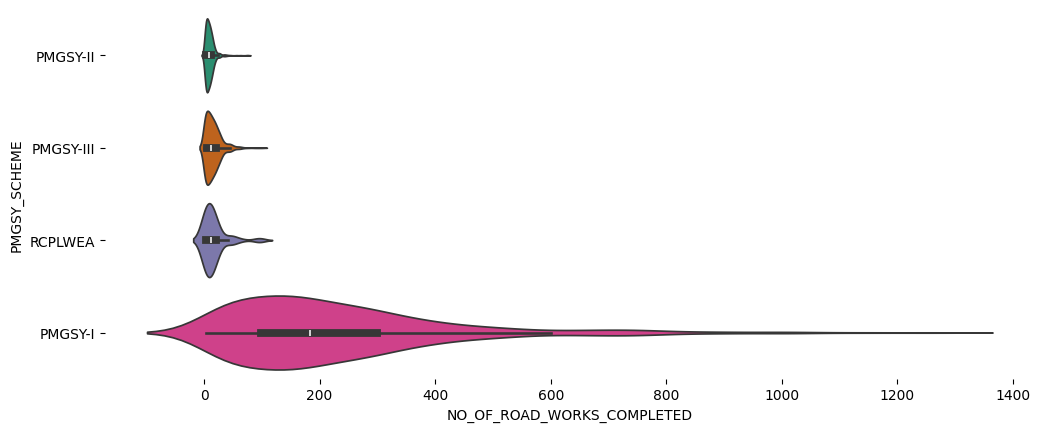

In [ ]:
# @title PMGSY_SCHEME vs NO_OF_ROAD_WORKS_COMPLETED

import seaborn as sns
figsize = (12, 1.2 * len(merged_df['PMGSY_SCHEME'].unique()))
plt.figure(figsize=figsize)

sns.violinplot(merged_df, x='NO_OF_ROAD_WORKS_COMPLETED', y='PMGSY_SCHEME', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
gen_df = merged_df['NO_OF_ROAD_WORKS_COMPLETED'].groupby(merged_df['PMGSY_SCHEME']).sum().sort_values(ascending=False)
gen_df.to_csv('gen_df.csv')

print(gen_df)

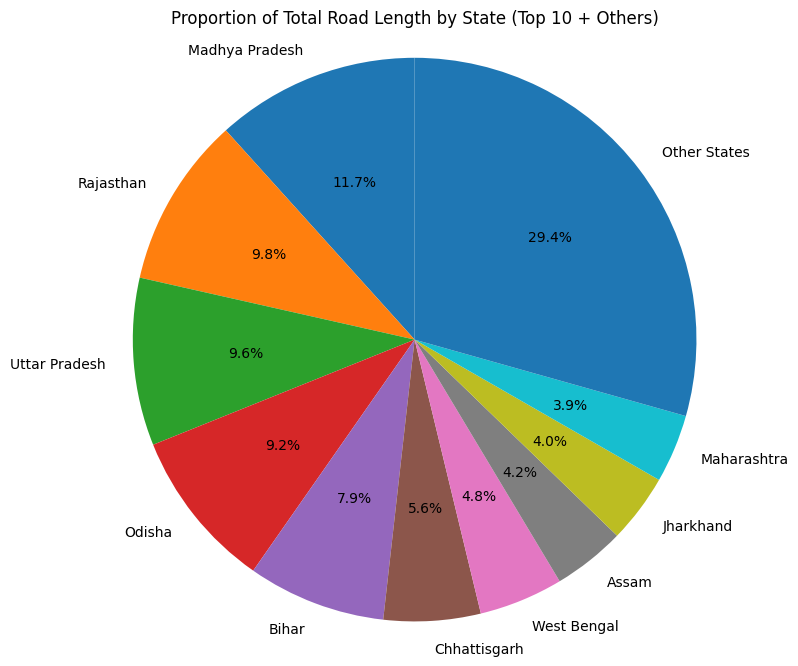

In [ ]:

# Calculate total road length by state
state_road_length = merged_df.groupby('STATE_NAME')['LENGTH_OF_ROAD_WORK_COMPLETED_KM'].sum()

state_road_length.to_csv('state_road_length.csv')
# Sort states by total road length in descending order
top_10_states = state_road_length.sort_values(ascending=False).head(10)

# Calculate the total length for other states
other_states_length = state_road_length.sum() - top_10_states.sum()

# Create a pie chart
labels = list(top_10_states.index) + ['Other States']
sizes = list(top_10_states.values) + [other_states_length]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Total Road Length by State (Top 10 + Others)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

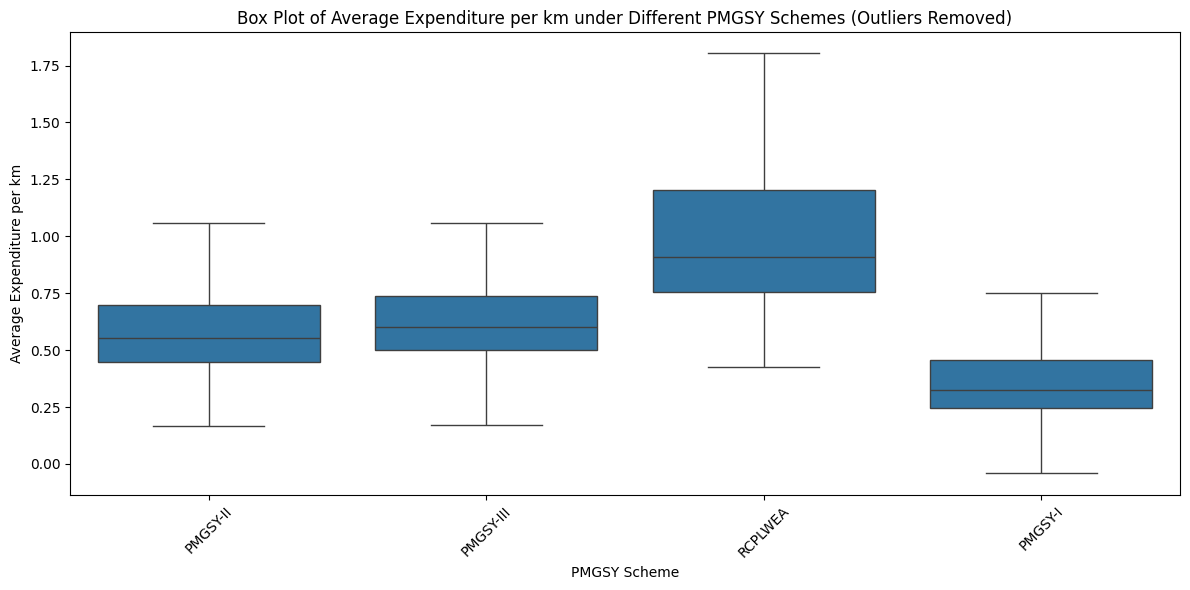

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='PMGSY_SCHEME', y='actual_expenditure_per_km', data=merged_df, showfliers=False) #showfliers=False removes outliers
box_df = merged_df[['PMGSY_SCHEME', 'actual_expenditure_per_km']]
box_df.to_csv('box_df.csv')
plt.title('Box Plot of Average Expenditure per km under Different PMGSY Schemes (Outliers Removed)')
plt.xlabel('PMGSY Scheme')
plt.ylabel('Average Expenditure per km')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 1. Calculate Total Road Length by State
state_road_length = merged_df.groupby('STATE_NAME')['LENGTH_OF_ROAD_WORK_COMPLETED_KM'].sum().reset_index()

# 2. Calculate Average Actual Cost per km by State
state_avg_cost = merged_df.groupby('STATE_NAME')['actual_expenditure_per_km'].mean().reset_index()

# 3. Merge with Area Data
state_summary_df = pd.merge(state_road_length, state_avg_cost, on='STATE_NAME')
state_summary_df = pd.merge(state_summary_df, area_df, on='STATE_NAME')

# 4. Select Desired Columns and Rename
state_summary_df = state_summary_df[['STATE_NAME', 'LENGTH_OF_ROAD_WORK_COMPLETED_KM', 'actual_expenditure_per_km', 'AREA_SQ_KM']]
state_summary_df = state_summary_df.rename(columns={
    'LENGTH_OF_ROAD_WORK_COMPLETED_KM': 'Total Road Length',
    'actual_expenditure_per_km': 'Average Actual Cost per km',
    'AREA_SQ_KM': 'State Area'
})

# Display the DataFrame
display(state_summary_df)

,STATE_NAME,Total Road Length,Average Actual Cost per km,State Area
0,Andaman And Nicobar,119.193,0.368815,8249
1,Andhra Pradesh,17830.136,0.419941,162968
2,Arunachal Pradesh,13648.826,1.049113,83743
3,Assam,31814.729,0.718847,78438
4,Bihar,60763.349,0.643765,94163
5,Chhattisgarh,42583.007,0.545797,135192
6,Gujarat,15329.471,0.426196,196244
7,Haryana,8001.973,0.473142,44212
8,Himachal Pradesh,21385.122,0.642429,55673
9,Jammu And Kashmir,19104.030,0.932628,222236


1. Formulate Hypotheses

Null Hypothesis (H0): There is no significant difference in the average actual expenditure per km between the different PMGSY schemes.
Alternative Hypothesis (H1): There is a significant difference in the average actual expenditure per km between the different PMGSY schemes.


In [ ]:
import statsmodels.formula.api as smf # Change import statement to use smf
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.regressionplots import abline_plot
from scipy import stats

# 1. Perform ANOVA Test

# Assuming your DataFrame is named 'merged_df' and has columns 'PMGSY_SCHEME' and 'actual_expenditure_per_km'
model = smf.ols('actual_expenditure_per_km ~ PMGSY_SCHEME', data=merged_df).fit() # Use smf instead of sm
anova_table = anova_lm(model, typ=2)
print(anova_table)


# 2. Check Assumptions

# Normality: Check using Shapiro-Wilk test for each group
for scheme in merged_df['PMGSY_SCHEME'].unique():
    data = merged_df[merged_df['PMGSY_SCHEME'] == scheme]['actual_expenditure_per_km']
    statistic, p_value = stats.shapiro(data)
    print(f"Shapiro-Wilk Test for {scheme}: Statistic={statistic}, p-value={p_value}")

# Homogeneity of Variance: Check using Levene's test
statistic, p_value = stats.levene(*[merged_df['actual_expenditure_per_km'][merged_df['PMGSY_SCHEME'] == scheme] for scheme in merged_df['PMGSY_SCHEME'].unique()])
print(f"Levene's Test: Statistic={statistic}, p-value={p_value}")

# Interpretation

# ANOVA Table: Look for the p-value (PR(>F)) in the ANOVA table. If it's less than your significance level (e.g., 0.05), reject the null hypothesis and conclude that there is a significant difference in means.
# Shapiro-Wilk Test: If p-value < significance level for any group, the normality assumption is violated for that group.
# Levene's Test: If p-value < significance level, the homogeneity of variance assumption is violated.

                    sum_sq      df         F    PR(>F)
PMGSY_SCHEME    160.194088     3.0  7.522492  0.000053
Residual      14849.956440  2092.0       NaN       NaN
Shapiro-Wilk Test for PMGSY-II: Statistic=0.8717022088165098, p-value=1.9862219935655772e-23
Shapiro-Wilk Test for PMGSY-III: Statistic=0.0717188690342726, p-value=1.069453111363139e-47
Shapiro-Wilk Test for RCPLWEA: Statistic=0.7375980003816217, p-value=1.757217906910643e-08
Shapiro-Wilk Test for PMGSY-I: Statistic=0.8994470330987803, p-value=2.8419742030582123e-21
Levene's Test: Statistic=3.2186130130316672, p-value=0.021928459665215252


Interpretation:

If the p-value is less than your significance level (e.g., 0.05), you would reject the null hypothesis and conclude that there is a significant difference in the average actual expenditure per km between the different PMGSY schemes.
If the p-value is greater than your significance level, you would fail to reject the null hypothesis and conclude that there is no significant difference.

Hypothesis 1:

Null Hypothesis (H0): There is no significant relationship between the total road length completed and the state area.
Alternative Hypothesis (H1): There is a significant relationship between the total road length completed and the state area.

In [ ]:
import scipy.stats as stats

# Calculate Pearson correlation coefficient
correlation, p_value = stats.pearsonr(state_summary_df['Total Road Length'], state_summary_df['State Area'])

# Print the results
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")


Pearson Correlation Coefficient: 0.7279355316540873
P-value: 5.141880524394789e-06


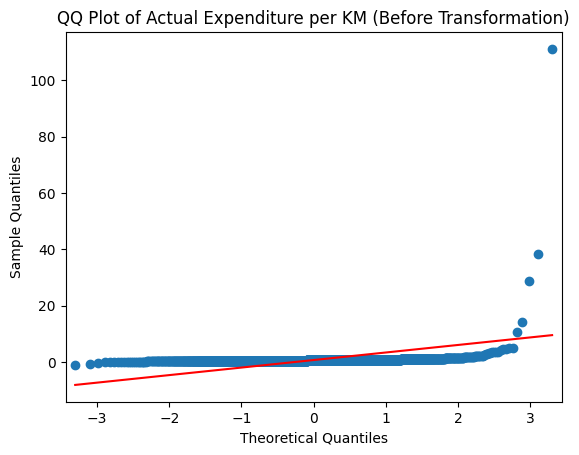

Shapiro-Wilk Test (Before Transformation): Statistic=0.0541738978747911, p-value=9.201206107922576e-73


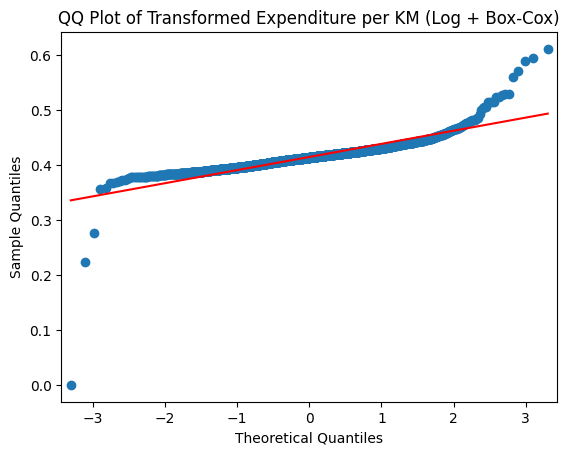

Shapiro-Wilk Test (After Log + Box-Cox): Statistic=0.7885393309704485, p-value=5.59124070067253e-46


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

# Assuming your data is in the 'actual_expenditure_per_km' column of 'merged_df'
data = merged_df['actual_expenditure_per_km']

# 1. Create QQ Plot (before transformation)
sm.qqplot(data, line='s')
plt.title("QQ Plot of Actual Expenditure per KM (Before Transformation)")
plt.show()

# 2. Check for Normality (before transformation)
statistic, p_value = stats.shapiro(data)
print(f"Shapiro-Wilk Test (Before Transformation): Statistic={statistic}, p-value={p_value}")

# 3. Log Transformation
if any(data <= 0):
    log_transformed_data = np.log(data + 1 - min(data))
else:
    log_transformed_data = np.log(data)

# 4. Box-Cox Transformation (after log transformation)
# Ensure all values are positive for Box-Cox
if any(log_transformed_data <= 0):
    boxcox_transformed_data, lambda_value = stats.boxcox(log_transformed_data + 1 - min(log_transformed_data))
else:
    boxcox_transformed_data, lambda_value = stats.boxcox(log_transformed_data)

# 5. Create QQ Plot for Transformed Data
sm.qqplot(boxcox_transformed_data, line='s')
plt.title("QQ Plot of Transformed Expenditure per KM (Log + Box-Cox)")
plt.show()

# 6. Update DataFrame
merged_df['transformed_expenditure_per_km'] = boxcox_transformed_data

# 7. Check for Normality (after transformation)
statistic, p_value = stats.shapiro(boxcox_transformed_data)
print(f"Shapiro-Wilk Test (After Log + Box-Cox): Statistic={statistic}, p-value={p_value}")